# Seaborn Basics


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze a restaurant invoices and tips

In [5]:
df = sns.load_dataset('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Counting number of datapoints
---

❓ **On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order
- Don't use rainbow colors

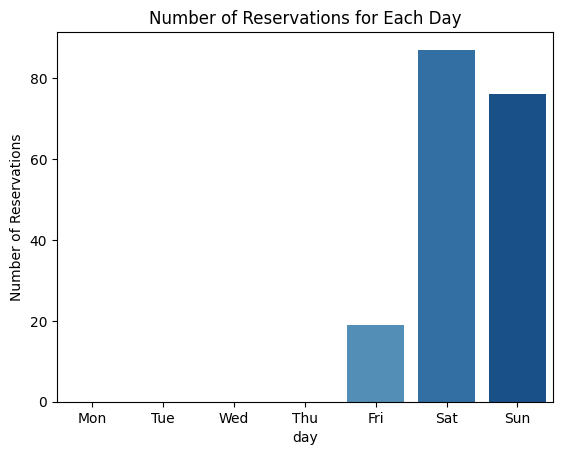

In [8]:
# Load the 'tips' dataset
df = sns.load_dataset('tips')

# Set the order of days for the x-axis
days_order = ['Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']

# Create the countplot
sns.countplot(data=df, x='day', order=days_order, palette='Blues')

# Display the plot
plt.title("Number of Reservations for Each Day")
plt.ylabel("Number of Reservations")
plt.show()

❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

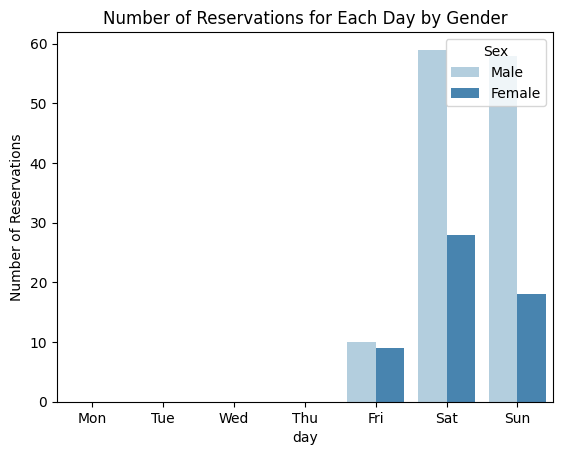

In [9]:
# Load the 'tips' dataset
df = sns.load_dataset('tips')

# Set the order of days for the x-axis
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create the countplot with a hue for 'sex'
sns.countplot(data=df, x='day', hue='sex', order=days_order, palette='Blues')

# Display the plot
plt.title("Number of Reservations for Each Day by Gender")
plt.ylabel("Number of Reservations")
plt.legend(title='Sex')
plt.show()

## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seaborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

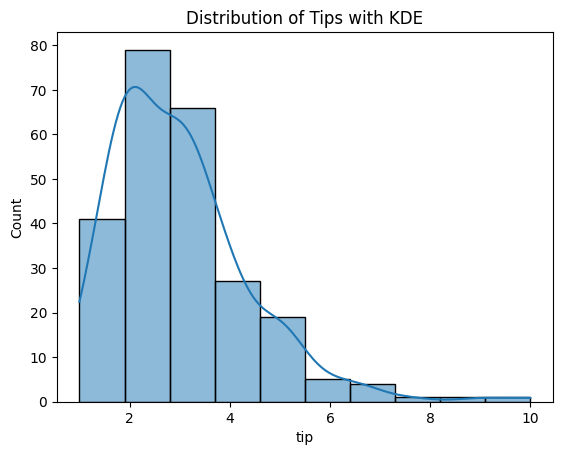

In [11]:
df = sns.load_dataset('tips')

# Using histplot (seaborn v0.11 and later)
sns.histplot(df['tip'], bins=10, kde=True)
plt.title("Distribution of Tips with KDE")
plt.show()

### 2.1 Multiples distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots (`"bar"`, `"box"`, `"violin"`, `"boxen"`)

<img src="https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/boxplot_example.png" width=350>

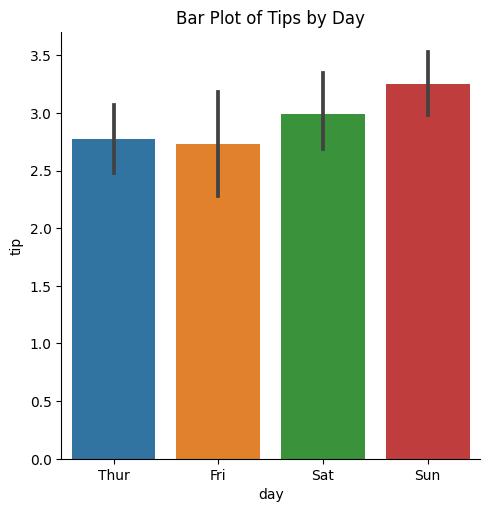

In [14]:
sns.catplot(data=df, x='day', y='tip', kind='bar')
plt.title("Bar Plot of Tips by Day")
plt.show()

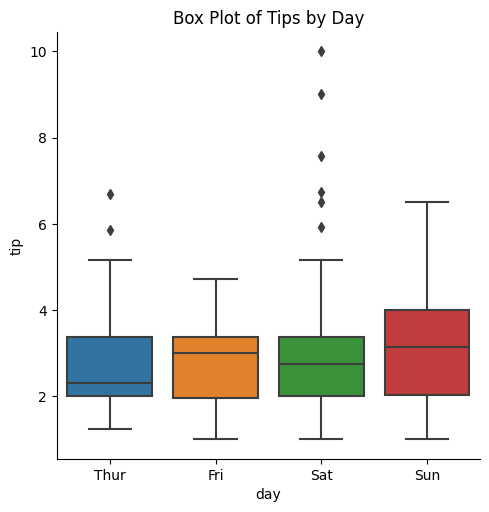

In [15]:
sns.catplot(data=df, x='day', y='tip', kind='box')
plt.title("Box Plot of Tips by Day")
plt.show()

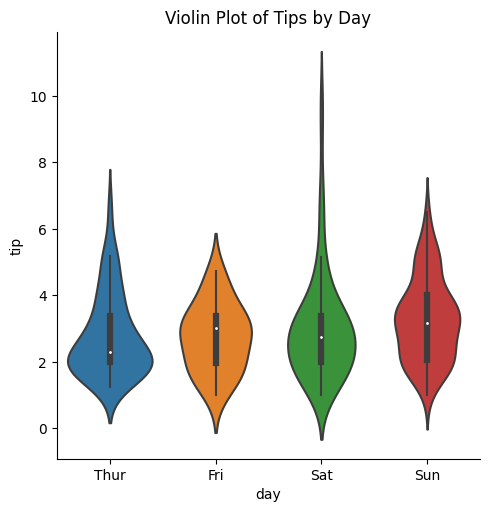

In [16]:
sns.catplot(data=df, x='day', y='tip', kind='violin')
plt.title("Violin Plot of Tips by Day")
plt.show()

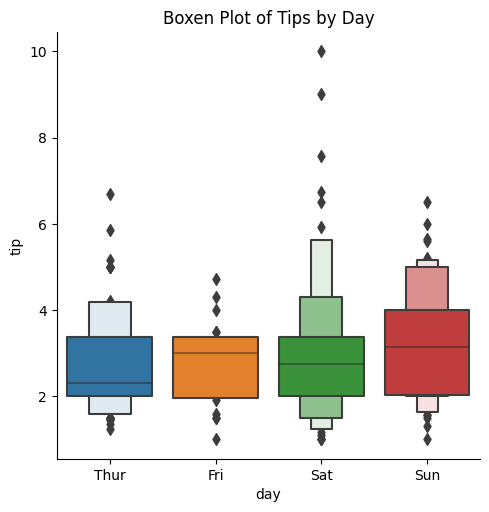

In [17]:
sns.catplot(data=df, x='day', y='tip', kind='boxen')
plt.title("Boxen Plot of Tips by Day")
plt.show()

### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` inside `g.map` to another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

In [ ]:
g = sns.FacetGrid(df, col="day")
g.map(sns.scatterplot, 'total_bill', 'tip')

❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

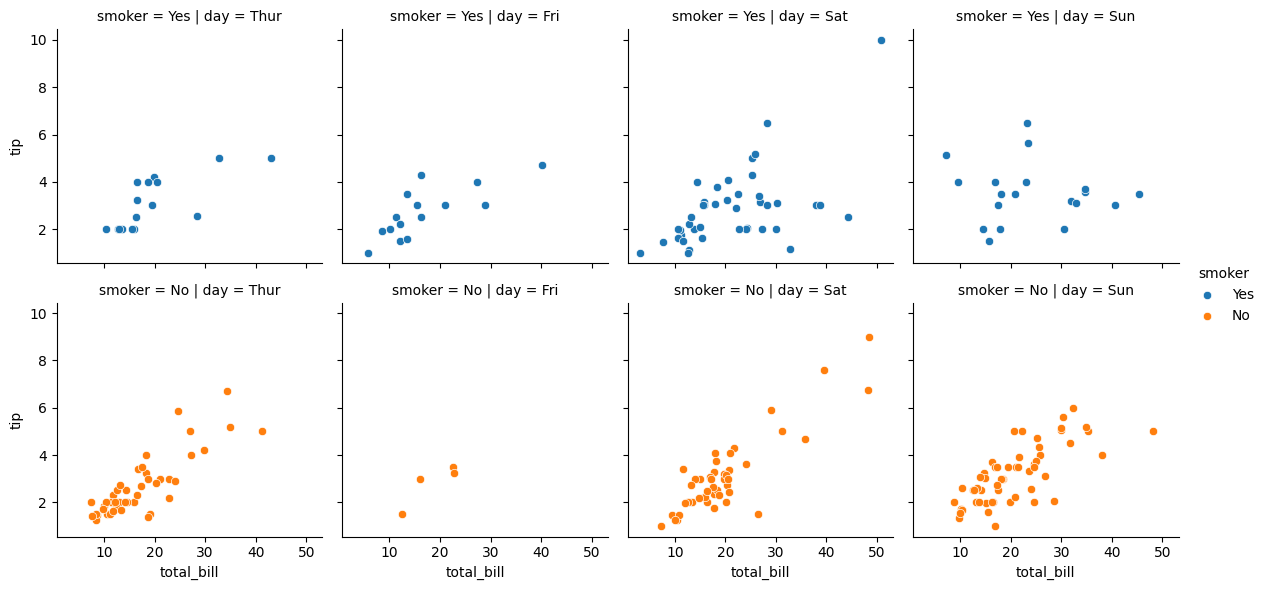

In [18]:
g = sns.FacetGrid(df, col="day", row="smoker", hue="smoker")
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()

## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

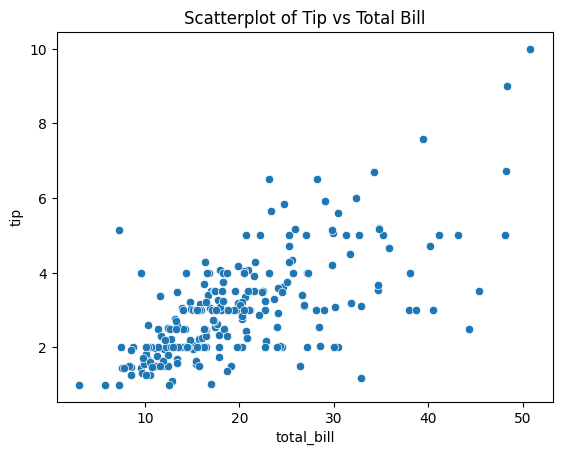

In [19]:
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title("Scatterplot of Tip vs Total Bill")
plt.show()

❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

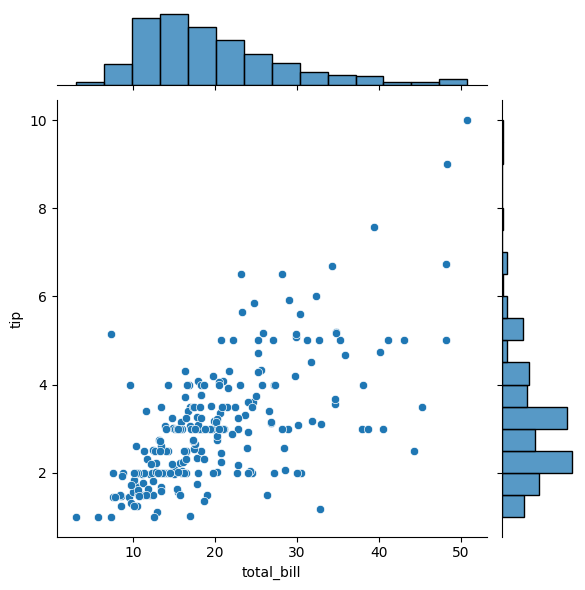

In [20]:
sns.jointplot(data=df, x='total_bill', y='tip')
plt.show()

❓ Let's now compute a simple linear regression curve using `sns.regplot()`

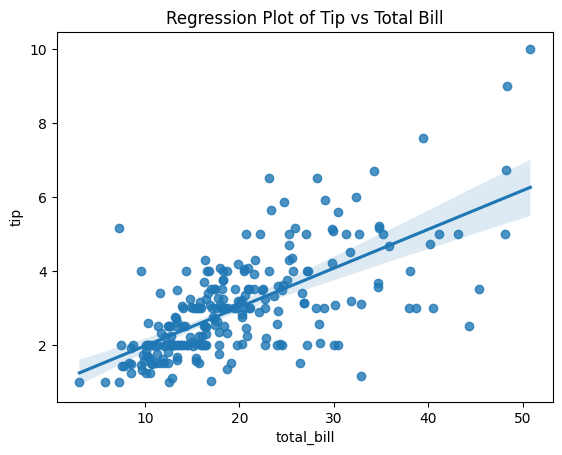

In [21]:
sns.regplot(data=df, x='total_bill', y='tip')
plt.title("Regression Plot of Tip vs Total Bill")
plt.show()

❓Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

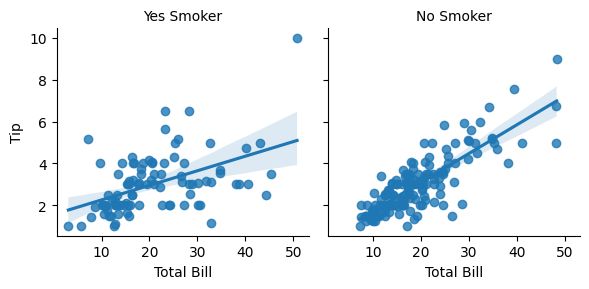

In [22]:
g = sns.FacetGrid(df, col="smoker")
g.map(sns.regplot, 'total_bill', 'tip')
g.set_axis_labels("Total Bill", "Tip")
g.set_titles("{col_name} Smoker")
plt.show()

## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

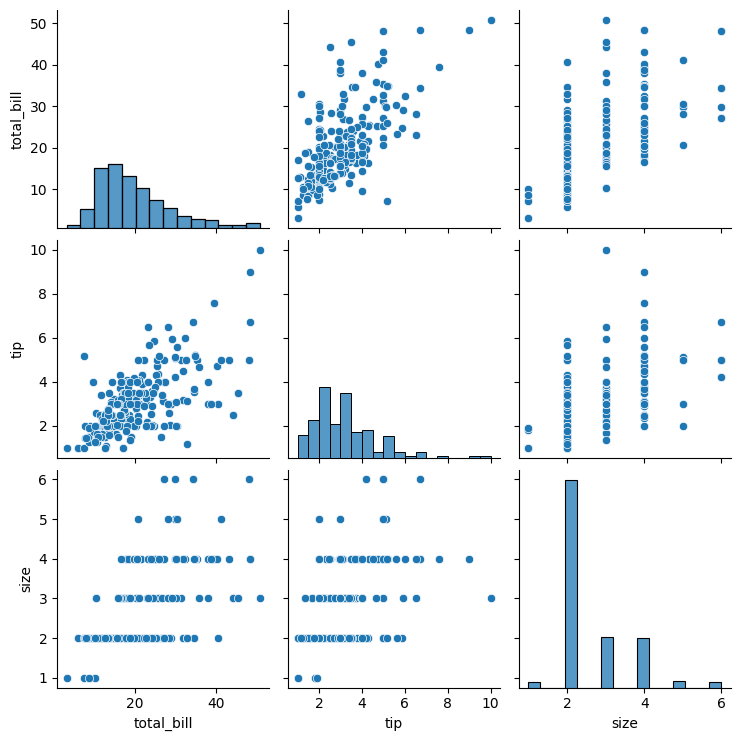

In [25]:
sns.pairplot(df)
plt.show()

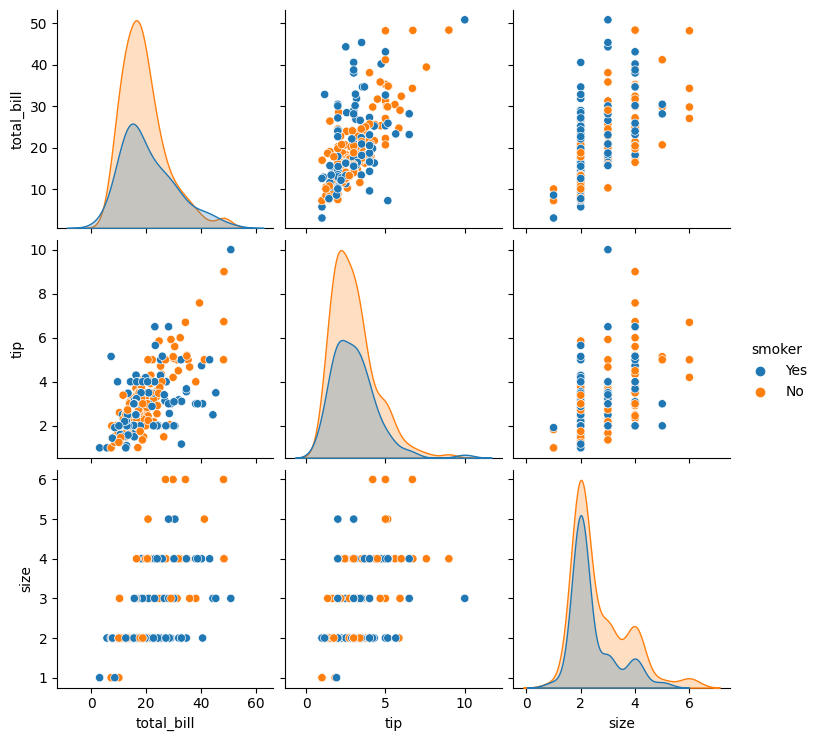

In [24]:
sns.pairplot(df, hue='smoker')
plt.show()